In [41]:
# Assignment 1: Iris Flower Classification using Decision Tree
# Task:
# 1. Load the Iris dataset.
# 2. Split the data into training and testing sets (80% training, 20% testing).
# 3. Train a Decision Tree Classifier on the training set.
# 4. Visualize the decision tree formed.
# 5. Evaluate the model using a confusion matrix and classification report.
# 6. Predict the species for a new input: [[5.1, 3.5, 1.4, 0.2]] (sepal length,
# sepal width, petal length, petal width).

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [83]:
iris_df=sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [84]:
X=iris_df.drop(columns=['species'])
y=iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
classifer_model=DecisionTreeClassifier()
classifer_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
prediction_values=classifer_model.predict(X_test)


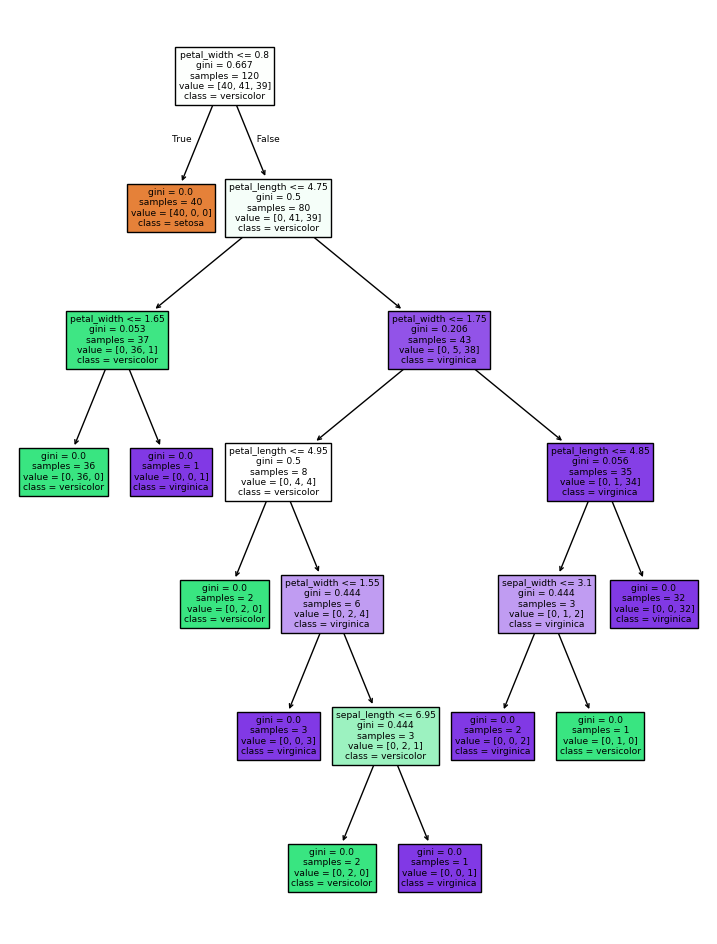

In [93]:
plt.figure(figsize=(9,12))
tree.plot_tree(classifer_model, feature_names=X.columns, class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()

In [92]:
classifer_model.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [48]:
iris_report=classification_report(y_test,prediction_values)
print(iris_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
iris_confusion_metrics=confusion_matrix(y_test,prediction_values)
print(iris_confusion_metrics)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: >

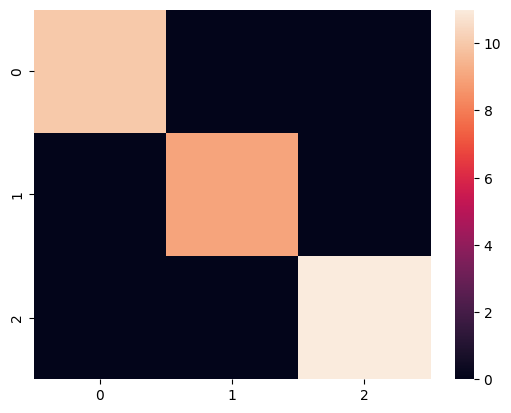

In [50]:
sns.heatmap(iris_confusion_metrics)

In [51]:
input_values= [[5.1, 3.5, 1.4, 0.2]] 
predicted_value=classifer_model.predict(input_values)
print(predicted_value)

['setosa']


/home/om/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [52]:
# Assignment 2: Heart Disease Prediction using Decision Tree
# Objective: Use the Heart Disease dataset to predict whether a person has heart disease
# based on various medical attributes.
# Task:
# 1. Load the Heart Disease dataset.
# 2. Perform basic data preprocessing (e.g., handling missing values).
# 3. Split the data into training and testing sets (80% training, 20% testing).
# 4. Train a Decision Tree Classifier.
# 5. Plot the decision tree.
# 6. Evaluate the model using accuracy, confusion matrix, and classification report.
# 7. Test the classifier with the following input: [[63, 1, 3, 145, 233, 1, 0, 150,
# 0, 2.3, 0, 0, 1]] (attributes represent age, sex, chest pain type, etc.).
# Expected Output:
# • Accuracy of the model
# • Confusion Matrix and Classification Report
# • Visualization of the Decision Tree
# • Prediction for the given input

In [53]:
heart_disease_df=pd.read_csv('hf.csv')
heart_disease_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [54]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [55]:
X=heart_disease_df.drop(columns=['DEATH_EVENT'])
y=heart_disease_df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
classifer_model_heart_disease=DecisionTreeClassifier()
classifer_model_heart_disease.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
predicted_values=classifer_model_heart_disease.predict(X_test)
predicted_values

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

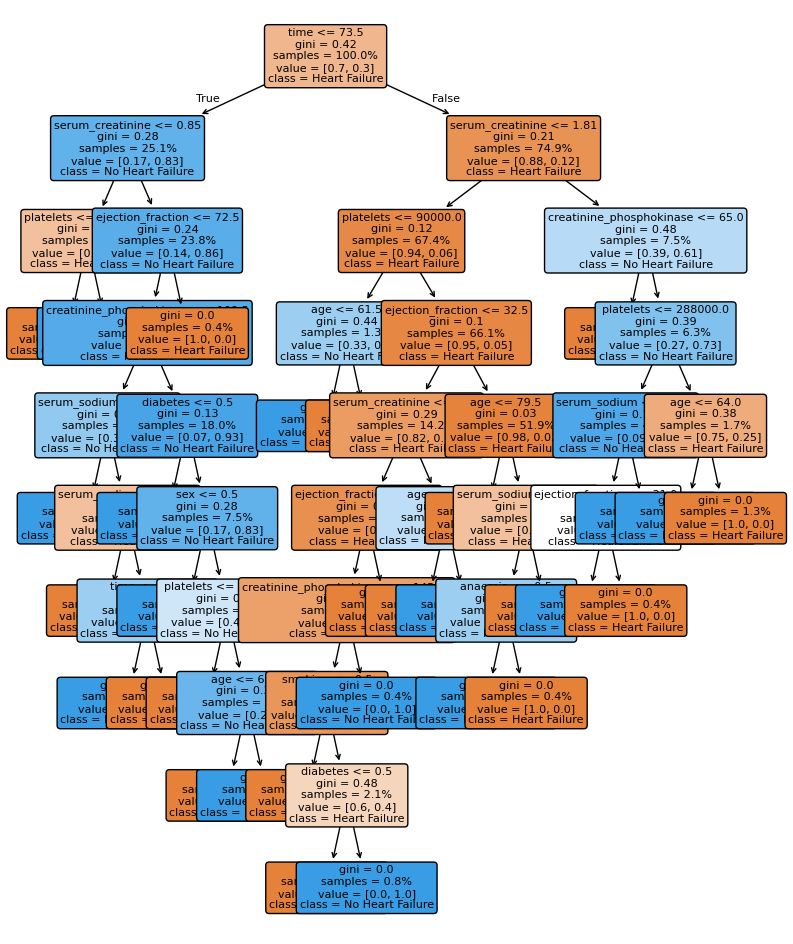

In [58]:
plt.figure(figsize=(9,12))
tree.plot_tree(classifer_model_heart_disease,feature_names=X_train.columns,class_names=['Heart Failure', 'No Heart Failure'],filled=True, 
    rounded=True, 
    precision=2,  # Display precision for threshold values
    fontsize=8,   # Adjust font size for better readability
    proportion=True  )
plt.show()

In [59]:
heart_failure_report=classification_report(y_test,predicted_values)
print(heart_failure_report)

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        35
           1       0.62      0.40      0.49        25

    accuracy                           0.65        60
   macro avg       0.64      0.61      0.61        60
weighted avg       0.64      0.65      0.63        60



In [60]:
heart_failure_confusion_metrics=confusion_matrix(y_test,predicted_values)
print(heart_failure_confusion_metrics)

[[29  6]
 [15 10]]


<Axes: >

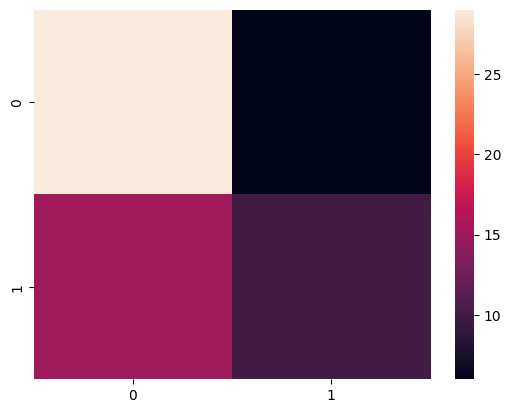

In [61]:
sns.heatmap(heart_failure_confusion_metrics)

In [62]:
input_values=[[63, 1, 3, 145, 233, 1, 0, 150,
0, 2.3, 0, 0]]
unknow_value_prediction=classifer_model_heart_disease.predict(input_values)
if(unknow_value_prediction==1):
    print('There Is Heart Failure')
else:
    print('There Is No Heart Failure')

There Is No Heart Failure


/home/om/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [63]:
# Assignment 3: Titanic Survival Prediction using Decision Tree
# Task:
# 1. Load the Titanic dataset.
# 2. Perform basic data preprocessing:
# a. Handle missing values (e.g., in the "Age" and "Embarked" columns).
# b. Convert categorical features to numeric using label encoding or one-hot
# encoding.
# 3. Split the data into training and testing sets (80% training, 20% testing).
# 4. Train a Decision Tree Classifier on the training data.
# 5. Visualize the decision tree.
# 6. Evaluate the model using accuracy, confusion matrix, and classification report.
# 7. Test the classifier with this input: ['3', 'male', '22', '0', '0', '7.25',
# 'S'].
# Expected Output:
# • Confusion Matrix and Classification Report
# • Visualization of the Decision Tree
# • Prediction of survival for the provided input

In [64]:
titanic_df=sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [66]:
titanic_df.drop(columns=['deck'],inplace=True)
titanic_df['age'].fillna(0,inplace=True)
titanic_df['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


/tmp/ipykernel_74037/1009703414.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(0,inplace=True)


In [67]:
mean_age=titanic_df['age'].mean()
titanic_df['age'].replace(0,mean_age,inplace=True)

/tmp/ipykernel_74037/4135942341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].replace(0,mean_age,inplace=True)


In [68]:
titanic_df[titanic_df['age']==0].count()
titanic_df.drop(inplace=True,columns=['survived','fare','who','adult_male','embark_town'])

In [69]:
titanic_df.dropna(inplace=True)
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    889 non-null    int64   
 1   sex       889 non-null    object  
 2   age       889 non-null    float64 
 3   sibsp     889 non-null    int64   
 4   parch     889 non-null    int64   
 5   embarked  889 non-null    object  
 6   class     889 non-null    category
 7   alive     889 non-null    object  
 8   alone     889 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(3), object(3)
memory usage: 57.4+ KB


In [70]:
titanic_df.drop(columns=['alone'],inplace=True)
X=titanic_df.drop(columns=['alive'])
y=titanic_df['alive']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    889 non-null    int64   
 1   sex       889 non-null    object  
 2   age       889 non-null    float64 
 3   sibsp     889 non-null    int64   
 4   parch     889 non-null    int64   
 5   embarked  889 non-null    object  
 6   class     889 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 49.6+ KB


In [71]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,5,6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
titanic_df_classifier=DecisionTreeClassifier()
titanic_df_classifier.fit(X_train,y_train)


DecisionTreeClassifier()

In [73]:
ohe_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(['sex', 'embarked', 'class'])
feature_names = np.concatenate((ohe_feature_names, ['pclass', 'age', 'sibsp', 'parch']))


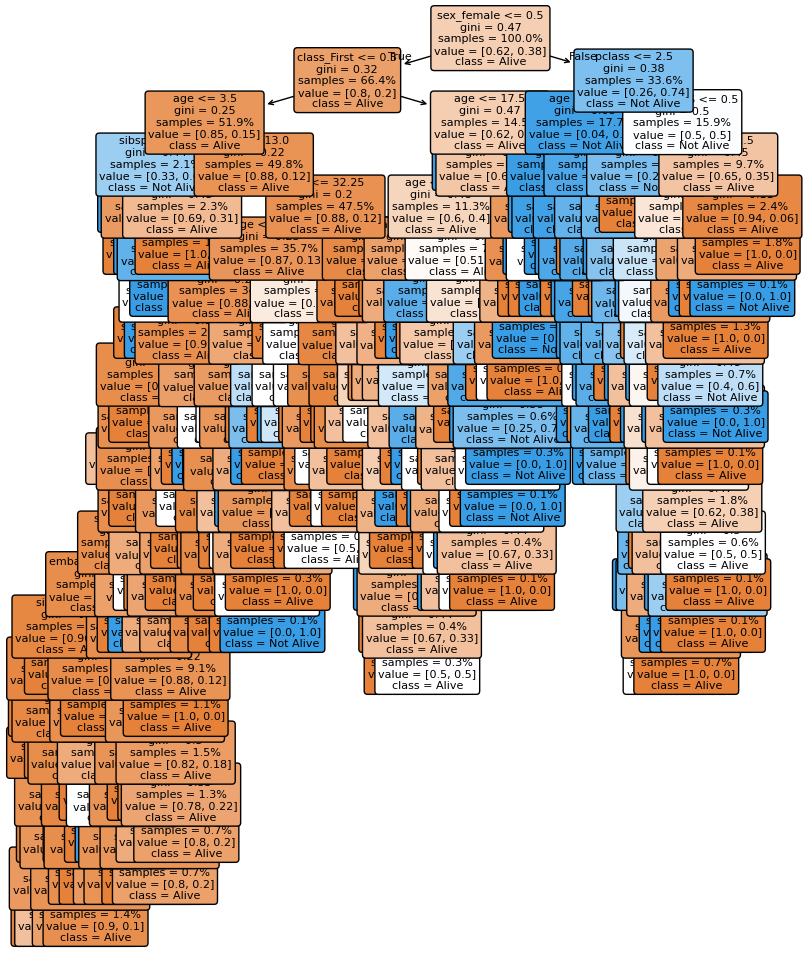

In [74]:
plt.figure(figsize=(9,12))
tree.plot_tree(titanic_df_classifier,feature_names=feature_names,class_names=['Alive', 'Not Alive'],filled=True, 
    rounded=True, 
    precision=2,  # Display precision for threshold values
    fontsize=8,   # Adjust font size for better readability
    proportion=True  )
plt.show()

In [75]:
titanic_df_predicted_values=titanic_df_classifier.predict(X_test)
print(titanic_df_predicted_values)

['no' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no'
 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes'
 'no' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'no' 'yes'
 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'yes'
 'no' 'yes' 'no' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no'
 'yes' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no'
 'yes' 'no' 'no' 'yes']


In [76]:
titanic_df_confusion_matrix=confusion_matrix(y_test,titanic_df_predicted_values)
print(titanic_df_confusion_matrix)

[[90 19]
 [18 51]]


<Axes: >

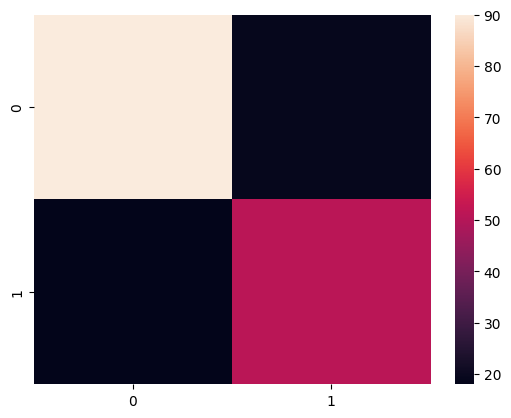

In [77]:
sns.heatmap(titanic_df_confusion_matrix)

In [78]:
titanic_df_classification_report=classification_report(y_test,titanic_df_predicted_values)
print(titanic_df_classification_report)

              precision    recall  f1-score   support

          no       0.83      0.83      0.83       109
         yes       0.73      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [79]:
unknow_input_titanic_values= [[3, 'male', 22, 0, 0, 'S','First']]
generated_unknow_input_titanic_values = np.array(ct.transform(unknow_input_titanic_values))
print(generated_unknow_input_titanic_values)

[[0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 3 22 0 0]]


/home/om/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [80]:
prediction_unknow_input_titanic_values=titanic_df_classifier.predict(generated_unknow_input_titanic_values)
print(prediction_unknow_input_titanic_values)

['no']
